In [18]:
from PIL import Image
import io
import zipfile
import os
import numpy as np

def open_image_from_zip(file_path):
    if os.path.isfile(file_path):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            file_names = zip_ref.namelist()
            print(len(file_names))
            print(file_names[-1])
            # Assuming the file is an image
            with zip_ref.open(file_names[0]) as file:
                # Use PIL to open the image from a byte stream
                image = Image.open(io.BytesIO(file.read()))
                # Convert the image to a numpy array
                return np.array(image)
    else:
        print(f"File {file_path} does not exist.")
        return None

# Example usage
image_content = open_image_from_zip("training_sets/manually_segmented_ionograms.zip")
print(image_content.shape)


857
JM91J_2016184204804_AA.png
(512, 408, 4)


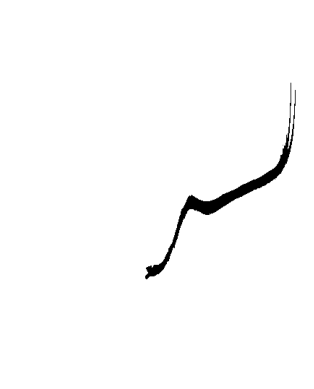

In [13]:
import matplotlib.pyplot as plt
def rgba_to_grayscale(image_array):
    # Extract the RGB channels (ignore the alpha channel)
    rgb_image = image_array[:, :, :3]
    # Convert to grayscale using the luminosity method
    grayscale_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140])
    return grayscale_image.astype(np.uint8)

def display_image_grayscale(image_array):
    # Display the grayscale image using the 'gray' colormap
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')  # Hide axis labels
    plt.show()

# Example usage
grayscale_image_content = rgba_to_grayscale(image_content)
display_image_grayscale(grayscale_image_content)

In [22]:

def load_npz_file(file_path):
    # Load the .npz file
    data = np.load(file_path)
    print(data)
    # Iterate over each array stored in the file and print its name and content
    for key, array in data.items():
        print(f"Array name: {key}")
        print(array)

# Example usage:
file_path = 'training_sets/binary_npz_converted/JM91J_2016001150304_converted.npz'
load_npz_file(file_path)

NpzFile 'training_sets/binary_npz_converted/JM91J_2016001150304_converted.npz' with keys: oPower
Array name: oPower
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
